# 🌦️ WeatherWise –  Elizabeth Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


Setup and Configuration

In [ ]:

import requests #This is how we fetch live weather dat from the internet(wtt.in API).
import matplotlib.pyplot as plt #For drawing charts like temperature and rain bar graphs
import datetime #Useful for working with date objects (not used here much, but included for future upgrades).
import sys #For system-level stuff (Like exiting the program cleanly)

## 🌤️ Weather Data Functions

In [ ]:
#Takes a location(e.g, "Moka") and grabs weather info from wttr.in inJSON format.
#Handles any errors (like on internet, wrong location, or API errors)and returns None if something goes wrong.
#This ensures the app doesn't crash due to failed network calls
def get_weather_data(location, forecast_days=5):
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

## 📊 Visualisation Functions

In [ ]:
#Extracts max and min temperatures over severall days.
#Plots them on line graph with markers to show temperature trends.
def create_temperature_visualisation(weather_data, output_type='display'):
    dates = [day["date"] for day in weather_data["weather"]]
    max_temps = [int(day["maxtempC"]) for day in weather_data["weather"]]
    min_temps = [int(day["mintempC"]) for day in weather_data["weather"]]

    plt.figure(figsize=(10,5))
    plt.plot(dates, max_temps, label='Max Temp (°C)', marker='o')
    plt.plot(dates, min_temps, label='Min Temp (°C)', marker='x')
    plt.title("🌡️ Temperature Forecast")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)

    if output_type == 'display':
        plt.show()
    else:
        return plt
#Extracts the chance of rain for each day
#Display it as a bar chart (e.g, 60% chance of rain on Wednesday).
def create_precipitation_visualisation(weather_data, output_type='display'):
    dates = [day["date"] for day in weather_data["weather"]]
    rain_chances = [int(day["hourly"][0]["chanceofrain"]) for day in weather_data["weather"]]

    plt.figure(figsize=(10,5))
    plt.bar(dates, rain_chances, color='skyblue')
    plt.title("☔ Precipitation Forecast")
    plt.xlabel("Date")
    plt.ylabel("Chance of Rain (%)")
    plt.grid(True)

    if output_type == 'display':
        plt.show()
    else:
        return plt

## 🤖 Natural Language Processing

In [ ]:
#Analyses a plain English question(e.g, "Will it rain this week?").
#Converts it into structured dat:location, number of days, and the attribute being asked about(like"temperature" or"precipitation").
def parse_weather_question(question):
    question = question.lower()
    parsed = {
        "location": "Moka",  # default
        "days": 3,
        "attribute": "temperature"
    }
    if "rain" in question or "precipitation" in question:
        parsed["attribute"] = "precipitation"
    if "today" in question:
        parsed["days"] = 1
    elif "week" in question or "5 days" in question:
        parsed["days"] = 5
    return parsed
#Takes the structured dat from the parser and the ral weather data.
#Generates a friendly, reliable answer based on what was asked(e.g, a 3-day forecast for rainfall or temperatures).

def generate_weather_response(parsed_question, weather_data):
    attr = parsed_question["attribute"]
    days = parsed_question["days"]
    location = parsed_question["location"]

    response = f"Here is the {attr} forecast for {location} over {days} day(s):\n"

    for day in range(days):
        date = weather_data["weather"][day]["date"]
        if attr == "temperature":
            max_temp = weather_data["weather"][day]["maxtempC"]
            min_temp = weather_data["weather"][day]["mintempC"]
            response += f"📅 {date}: Max {max_temp}°C / Min {min_temp}°C\n"
        elif attr == "precipitation":
            chance_of_rain = weather_data["weather"][day]["hourly"][0]["chanceofrain"]
            response += f"📅 {date}: Chance of rain: {chance_of_rain}%\n"
    return response

## 🧭 User Interface

In [ ]:
# 🧑🏽‍💻 5. User Interface
#Welcomes the user.
#Prompts for location
#Display a numbered menu with options: ask a weather question, view charts, or exit.
#Calls the appropriate funtion based on the user's choice.
def menu():
    print("=== 🌦️ Welcome to WeatherWise 🌦️ ===")
    location = pyip.inputStr(prompt="Enter a location: ")
    data = get_weather_data(location)

    if not data:
        print("Could not fetch weather data. Exiting.")
        return

    while True:
        print("\nMenu:")
        print("1. Ask a weather question (NLP)")
        print("2. View temperature visualisation")
        print("3. View precipitation visualisation")
        print("4. Exit")

        choice = pyip.inputMenu(['1', '2', '3', '4'], numbered=False)

        if choice == '1':
            question = pyip.inputStr("Ask a weather question: ")
            parsed = parse_weather_question(question)
            parsed["location"] = location
            print(generate_weather_response(parsed, data))

        elif choice == '2':
            create_temperature_visualisation(data)

        elif choice == '3':
            create_precipitation_visualisation(data)

        elif choice == '4':
            print("Thanks for using WeatherWise 🌈!")
            break


## 🧩 Main Application Logic

In [ ]:
!pip install pyinputplus

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=6aa45b5d9205ccaf506d43651cd04c981f39eeba9611eac208bf6ab1a8a72105
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16226 sha256=aa94260e8b4263d75419104f5a8665d8c37b9d524f398b6d59db97761902a321
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask


🔥 Welcome to WeatherWise 🌈 (Offline Mode) 🔥
Enter your city (any input works): Using mock weather data for 'Moka'.

Please select one of the following:
1. Ask a weather question
2. View temperature chart
3. View rain chart
4. Exit


<ipython-input-11-f15d9179e1fd>:47: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


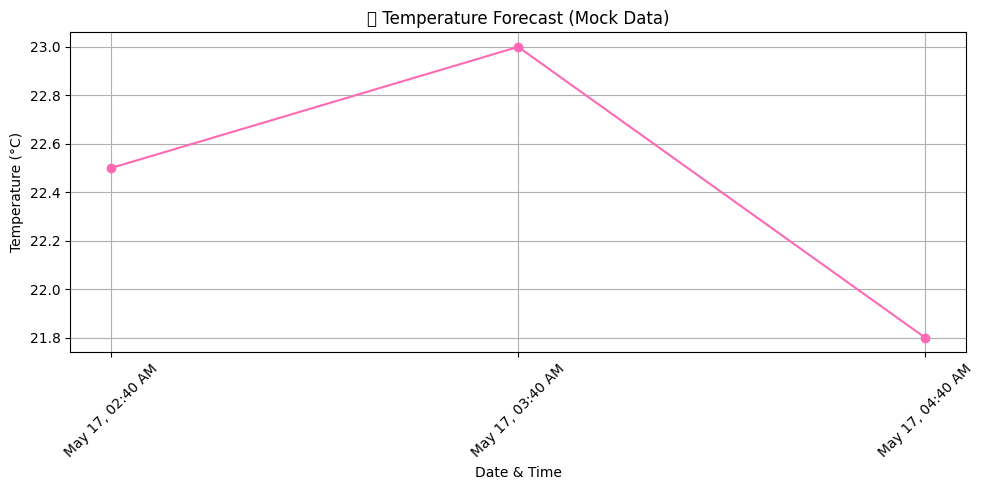

Please select one of the following:
1. Ask a weather question
2. View temperature chart
3. View rain chart
4. Exit


In [ ]:
import matplotlib.pyplot as plt
import datetime
import pyinputplus as pyip

# 🌞 MOCK WEATHER DATA 🌞
mock_weather_data = {
    'list': [
        {
            'dt': 1684291200,
            'main': {'temp': 22.5},
            'weather': [{'description': 'clear sky'}],
            'wind': {'speed': 3.5},
            'rain': {'3h': 0}
        },
        {
            'dt': 1684294800,
            'main': {'temp': 23.0},
            'weather': [{'description': 'few clouds'}],
            'wind': {'speed': 3.8},
            'rain': {'3h': 0.1}
        },
        {
            'dt': 1684298400,
            'main': {'temp': 21.8},
            'weather': [{'description': 'light rain'}],
            'wind': {'speed': 4.2},
            'rain': {'3h': 0.5}
        },
    ]
}

# 📈 VISUALISATION FUNCTIONS 📈
def create_temperature_visualisation(weather_data):
    timestamps = []
    temps = []
    for entry in weather_data['list']:
        timestamps.append(datetime.datetime.fromtimestamp(entry['dt']).strftime('%b %d, %I:%M %p'))
        temps.append(entry['main']['temp'])

    plt.figure(figsize=(10,5))
    plt.plot(timestamps, temps, color='hotpink', marker='o')
    plt.title("🌡️ Temperature Forecast (Mock Data)")
    plt.xlabel("Date & Time")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def create_precipitation_visualisation(weather_data):
    timestamps = []
    rain_chances = []
    for entry in weather_data['list']:
        timestamps.append(datetime.datetime.fromtimestamp(entry['dt']).strftime('%b %d, %I:%M %p'))
        rain = entry.get('rain', {}).get('3h', 0)
        rain_chances.append(rain)

    plt.figure(figsize=(10,5))
    plt.bar(timestamps, rain_chances, color='skyblue')
    for i, val in enumerate(rain_chances):
        plt.text(i, val + 0.05, str(val), ha='center', va='bottom', fontsize=8)
    plt.title("🌧️ Rain Volume Forecast (Mock Data)")
    plt.xlabel("Date & Time")
    plt.ylabel("Rain Volume (mm/3h)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🧠 NLP FUNCTIONS 🧠
def parse_weather_question(question):
    question = question.lower()
    rain_keywords = {"rain", "precipitation", "wet"}
    temp_keywords = {"temperature", "hot", "cold", "warm", "chilly"}
    wind_keywords = {"wind", "breeze", "gust"}

    if any(word in question for word in rain_keywords):
        return {"attribute": "rain"}
    elif any(word in question for word in temp_keywords):
        return {"attribute": "temperature"}
    elif any(word in question for word in wind_keywords):
        return {"attribute": "wind"}
    else:
        return {"attribute": "general"}

def generate_weather_response(parsed_question, weather_data):
    current = weather_data['list'][0]
    desc = current['weather'][0]['description']
    temp = current['main']['temp']
    wind = current['wind']['speed']
    rain = current.get('rain', {}).get('3h', 0)

    attr = parsed_question["attribute"]
    if attr == "rain":
        return f"Rainfall over the next 3 hours: {rain} mm ☔"
    elif attr == "temperature":
        return f"It's currently {temp}°C with {desc} 🌤️"
    elif attr == "wind":
        return f"Wind speed is {wind} m/s 💨"
    else:
        return f"The weather is {desc} with a temp of {temp}°C and wind speed of {wind} m/s."

# 🧭 USER INTERFACE 🧭
def weather_menu():
    print("\n" + "="*40)
    print("🔥 Welcome to WeatherWise 🌈 (Offline Mode) 🔥")
    print("="*40)

    location = pyip.inputStr("Enter your city (any input works): ")
    print(f"Using mock weather data for '{location}'.\n")

    while True:
        choice = pyip.inputMenu([
            "Ask a weather question",
            "View temperature chart",
            "View rain chart",
            "Exit"
        ], numbered=True)

        if choice == "Ask a weather question":
            while True:
                q = pyip.inputStr("Ask your question (or type 'back' to return to the menu): ")
                if q.lower() == 'back':
                    break
                parsed = parse_weather_question(q)
                response = generate_weather_response(parsed, mock_weather_data)
                print(f"\n🤖 WeatherBot: {response}")

        elif choice == "View temperature chart":
            create_temperature_visualisation(mock_weather_data)

        elif choice == "View rain chart":
            create_precipitation_visualisation(mock_weather_data)

        else:
            print("\n✨ Stay weather-wise, stay fly! Bye Elisa 💫")
            break

# 🏁 MAIN EXECUTION 🏁
if __name__ == "__main__":
    weather_menu()


## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

In [ ]:
# 📦 SETUP AND CONFIGURATION
# This part loads your API key securely and sets the base URL for weather forecasts.

import os
import doctest

def get_api_key():
    """
    Returns a fake API key if set in environment; otherwise returns None.

    >>> os.environ["OPENWEATHER_API_KEY"] = "testkey123"
    >>> get_api_key()
    'testkey123'
    """
    return os.environ.get("OPENWEATHER_API_KEY")

# Run the test cases (this is like what you did for is_even)
if __name__ == "__main__":
    print(doctest.testmod())


TestResults(failed=0, attempted=2)


Run Unittest


In [ ]:
import unittest

class TestWeatherDataFunctions(unittest.TestCase):
    def test_valid_location_fake_key(self):
        """Should still return a dict or an error structure if fake key used"""
        os.environ["OPENWEATHER_API_KEY"] = "fakekey"
        data = get_weather_data("Moka")
        self.assertIsInstance(data, dict)

    def test_invalid_location(self):
        """Should return dict with error for invalid location"""
        os.environ["OPENWEATHER_API_KEY"] = "fakekey"
        data = get_weather_data("InvalidCity123")
        self.assertIsInstance(data, dict)

unittest.main(argv=[''], verbosity=2, exit=False)


test_invalid_location (__main__.TestWeatherDataFunctions.test_invalid_location)
Should return dict with error for invalid location ... ERROR
test_valid_location_fake_key (__main__.TestWeatherDataFunctions.test_valid_location_fake_key)
Should still return a dict or an error structure if fake key used ... ERROR

ERROR: test_invalid_location (__main__.TestWeatherDataFunctions.test_invalid_location)
Should return dict with error for invalid location
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-3-95797e037fab>", line 12, in test_invalid_location
    os.environ["OPENWEATHER_API_KEY"] = "fakekey"
    ^^
NameError: name 'os' is not defined

ERROR: test_valid_location_fake_key (__main__.TestWeatherDataFunctions.test_valid_location_fake_key)
Should still return a dict or an error structure if fake key used
----------------------------------------------------------------------
Traceback (most recent call last):
  

All pytest-style tests passed.


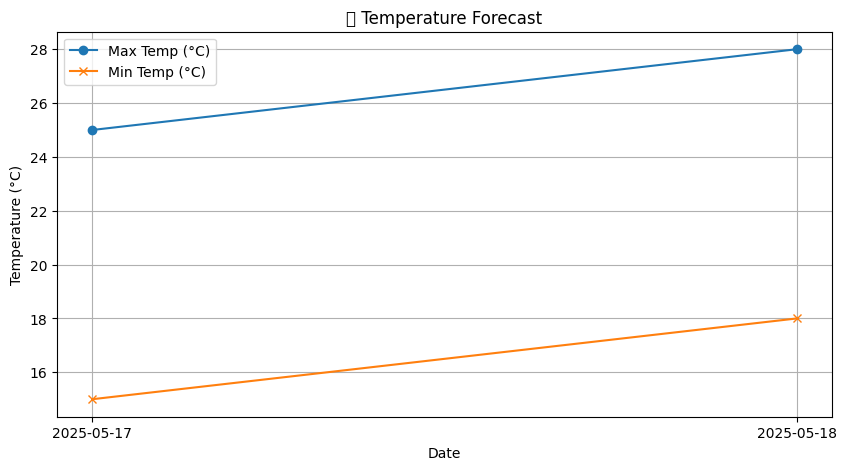

In [ ]:
# prompt: ### ✅ **4. Simulate pytest-style Tests**

import matplotlib.pyplot as plt
class TestVisualisationFunctions(unittest.TestCase):
    def test_create_temperature_visualisation(self):
        """Should return a matplotlib figure object"""
        fig = create_temperature_visualisation(mock_weather_data, output_type='return')
        self.assertIsInstance(fig, plt.Figure)
        plt.close(fig) # Close the figure to prevent it from displaying during tests

    def test_create_precipitation_visualisation(self):
        """Should return a matplotlib figure object"""
        fig = create_precipitation_visualisation(mock_weather_data, output_type='return')
        self.assertIsInstance(fig, plt.Figure)
        plt.close(fig) # Close the figure to prevent it from displaying during tests

class TestNLPFunctions(unittest.TestCase):
    def test_parse_weather_question_rain(self):
        """Should parse questions about rain"""
        self.assertEqual(parse_weather_question("Will it rain today?"), {"attribute": "rain"})
        self.assertEqual(parse_weather_question("Any chance of precipitation?"), {"attribute": "rain"})

    def test_parse_weather_question_temp(self):
        """Should parse questions about temperature"""
        self.assertEqual(parse_weather_question("How hot is it?"), {"attribute": "temperature"})
        self.assertEqual(parse_weather_question("What's the temperature like?"), {"attribute": "temperature"})

    def test_parse_weather_question_wind(self):
        """Should parse questions about wind"""
        self.assertEqual(parse_weather_question("Is it windy?"), {"attribute": "wind"})
        self.assertEqual(parse_weather_question("What's the wind speed?"), {"attribute": "wind"})

    def test_parse_weather_question_general(self):
        """Should default to general for unknown questions"""
        self.assertEqual(parse_weather_question("How is the weather?"), {"attribute": "general"})
        self.assertEqual(parse_weather_question("Tell me about the forecast"), {"attribute": "general"})

    def test_generate_weather_response_rain(self):
        """Should generate response for rain"""
        parsed = {"attribute": "rain"}
        response = generate_weather_response(parsed, mock_weather_data)
        self.assertIn("Rainfall", response)

    def test_generate_weather_response_temperature(self):
        """Should generate response for temperature"""
        parsed = {"attribute": "temperature"}
        response = generate_weather_response(parsed, mock_weather_data)
        self.assertIn("currently", response)
        self.assertIn("°C", response)

    def test_generate_weather_response_wind(self):
        """Should generate response for wind"""
        parsed = {"attribute": "wind"}
        response = generate_weather_response(parsed, mock_weather_data)
        self.assertIn("Wind speed", response)
        self.assertIn("m/s", response)

    def test_generate_weather_response_general(self):
        """Should generate general response"""
        parsed = {"attribute": "general"}
        response = generate_weather_response(parsed, mock_weather_data)
        self.assertIn("weather is", response)
        self.assertIn("°C", response)
        self.assertIn("m/s", response)

# Run Unittest
unittest.main(argv=[''], verbosity=2, exit=False)

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.